# Life Expectancy and GDP

For this project we are going to be analyzing data from the World Health Organization and the World Bank on GDP and life expectancy of 6 different countries.

#### Goal: To identify the relationship between GDP and life expectancy of these countries.
The other key focuses will be on the following:
* Exploring trends and distributions of the life expectancy's of each country.
* Exploring trends of the GDP's of each country.
* Exploring graphs for any odd features.

## Introduction:
Gross Domestic Product (GDP) and life expectancy are two important indicators that provide insight into the economic and social well-being of countries.

GDP is a measure of the total monetary value of goods and services produced within a country and is often used as a way of comparing the economic performance of different countries. On the other hand, life expectancy measures the average number of years a person can expect to live which is based on prevailing mortality rates. Life expectancy is used to show insight on the health of the population, quality of healthcare and social factors within a particular country.

In this analysis we will explore the trends, patterns and potential correlations between these two indicators as well as deviations from the expected relationships.

## Data:

We will start by loading in the data and taking a look at what we have:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# To see how many rows and columns we are dealing with:
df.shape

(96, 4)

This dataframe has 96 rows and 4 columns.

The column names currently include capital letters which will become tedious everytime we call on them so it would be beneficial to rename the columns for the rest of this project:

In [4]:
# Renaming columns:
df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'}, inplace=True)
df.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We now want to see how many unique values we have for our 'Year' and 'Country' columns:

In [5]:
print("Years included: {}".format(df.year.unique()))
print("Countries included: {}".format(df.country.unique()))

Years included: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
Countries included: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


From the above information we see that we have data about life expectancy and GDP on 6 different countries from the years 2000 to 2015.

## Analysis:
#### The key points we are going to focus on:
* The life expectancy of each country from 2000 to 2015.
* The GDP of each country from 2000 to 2015.
* The relationship between GDP and life expectancy of each country.
* Noting any odd features from the above plots.

We will start the analysis off by looking at the minimum, maximum and mean's of GDP and life expectancy:

In [12]:
# Function used to summarize some statistics such as minimum, maximum and mean of GDP and life expectancy:
def stat_summary(data):
    # GDP:
    high_gdp = round(df.gdp.max())
    country_high_gdp = df.loc[df['gdp'] == high_gdp].country.iloc[0]
    low_gdp = round(df.gdp.min())
    country_low_gdp = df.loc[df['gdp'] == low_gdp].country.iloc[0]
    # Life expectancy:
    high_LE = df.life_expectancy.max()
    country_high_LE = df.loc[df['life_expectancy'] == high_LE].country.iloc[0]
    low_LE = df.life_expectancy.min()
    country_low_LE = df.loc[df['life_expectancy'] == low_LE].country.iloc[0]
    
    print("GDP Statistics:")
    print("{} had the highest GDP of ${}.".format(country_high_gdp, high_gdp))
    print("{} had the lowest GDP of ${}.".format(country_low_gdp, low_gdp))
    print("The average GDP of all these countries: ${}.".format(round(df.gdp.mean())))
    print("\nLife expectancy Statistics:")
    print("{} had the highest peak in life expectancy of {}.".format(country_high_LE, high_LE))
    print("{} had the lowest life expectancy of {}.".format(country_low_LE, low_LE))
    print("The average life expectancy of all these countries: {}.".format(round(df.life_expectancy.mean(), 2)))
    
stat_summary(df)

GDP Statistics:
United States of America had the highest GDP of $18100000000000.
Zimbabwe had the lowest GDP of $4415702800.
The average GDP of all these countries: $3880498570768.

Life expectancy Statistics:
Germany had the highest peak in life expectancy of 81.0.
Zimbabwe had the lowest life expectancy of 44.3.
The average life expectancy of all these countries: 72.79.


Next we will view a line plot of life expectancy of each country:

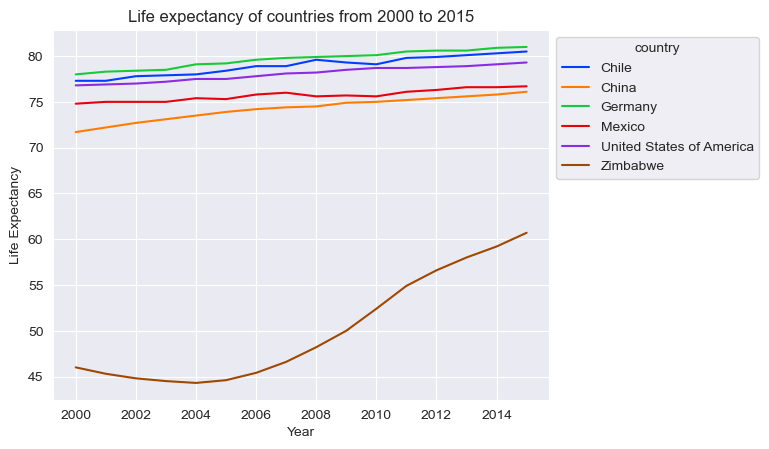

In [5]:
sns.set_style('darkgrid')
ax = sns.lineplot(x='year', y='life_expectancy', data=df, hue='country', palette='bright')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.title('Life expectancy of countries from 2000 to 2015')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

plt.show()

The above line plot highlights the difference in life expectancy of each country over time with a significant difference of Zimbabwe having a much lower life expectancy than the other countries. However, from around 2004 to 2015, Zimbabwe had the largest increase in life expectancy as opposed to the overall steady increase of the remaining countries.

Now let's look at the GDP's of each country:

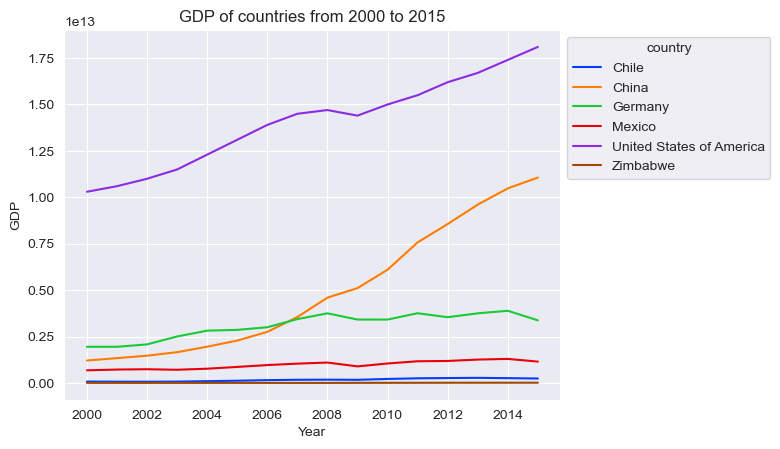

In [6]:
sns.set_style('darkgrid')
ax = sns.lineplot(x='year', y='gdp', data=df, hue='country', palette='bright')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.title('GDP of countries from 2000 to 2015')
plt.xlabel('Year')
plt.ylabel('GDP')

plt.show()

From the above line plot we see that the U.S. and China had the most significant increase in GDP from 2000 to 2015 with the U.S. having the highest GDP during this time whilst Zimbabwe had the lowest GDP. It is unclear from this plot alone whether or not Chile and Zimbabwe had any relative fluctuation in GDP so we will take a closer look.

To explore these countries in more detail we will look at their GDP's separately in a grid:

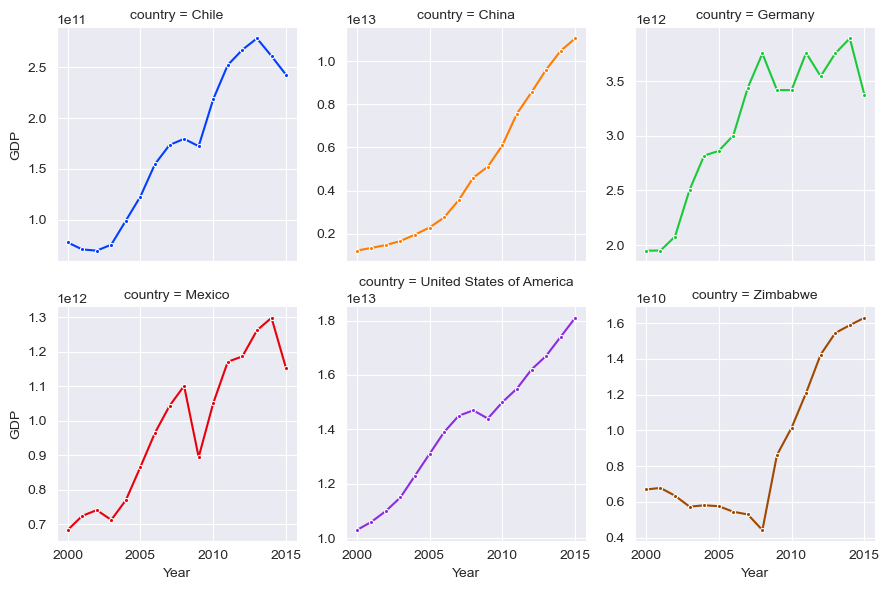

In [7]:
grid = sns.FacetGrid(df, col='country', hue='country', palette='bright', col_wrap=3, sharey=False)
grid.map(sns.lineplot, 'year', 'gdp', marker='.')

grid.set_axis_labels('Year', 'GDP')

plt.show()

There are a few things happening in each plot above:
* We can see that from 2000 to around 2008, Zimbabwe has experienced a decline in GDP. Although, from around 2008 to 2015, Zimbabwe has had a relatively large increase in GDP. 

* Chile has had a significant increase in GDP from around 2002 to 2013 but experienced a brief decline around 2008.

* Similar to Chile, Mexico has also experienced a significant increase overall in GDP from 2000 to 2013 with a significant decline around 2008 to 2009.

* Germany has had a positive increase in GDP from 2000 to around 2008 and has therafter experienced an overall stagnant growth from around 2008 to 2015.

* Lastly, the U.S. and China have both had a steady upward trend in GDP from 2000 to 2015. However, around 2008, the U.S. experienced a relatively significant decline whilst China experienced a slightly slower growth in GDP.

From the above observations, there is a turning point at around 2008 which could be attributed to the recession that occured in the U.S. causing the economies in many countries to struggle or decline.

Now we will look at a more detailed life expectancy for each country, with the observations of what we previously noticed in the GDP plots:

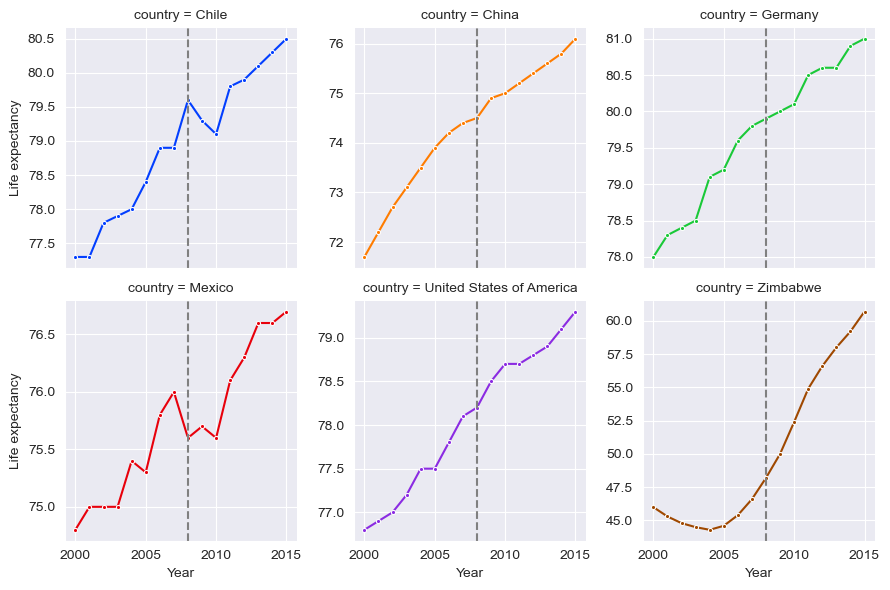

In [8]:
# Using a FacetGrid to plot out the life expectancy of each country individually to better see their relative fluctuations:
grid = sns.FacetGrid(df, col='country', hue='country', palette='bright', col_wrap=3, sharey=False)
grid.map(sns.lineplot, 'year', 'life_expectancy', marker='.')

# Adding a vertical line through the x-axis at the year 2008 to help us see any correlations with GDP:
def add_vertical_line(*args, **kwargs):
    plt.axvline(2008, color='grey', linestyle='dashed')
    
grid.map(add_vertical_line)

grid.set_axis_labels('Year', 'Life expectancy')

plt.show()

From the above plots, we firstly have a dashed line running through the year 2008 to help see any correlation with what was previously noticed in GDP trends of these countries. Overall, the trend of life expectancy in all of these countries are increasing over the years. However, there are some irregularities in the trends, looking at Chile and Mexico, we can see a decline for Chile and a slow in growth for Mexico just after 2008.

Now that we have looked at the life expectancy of each country individually, we will have a look at the distribution of their life expectancy's using a swarmplot:

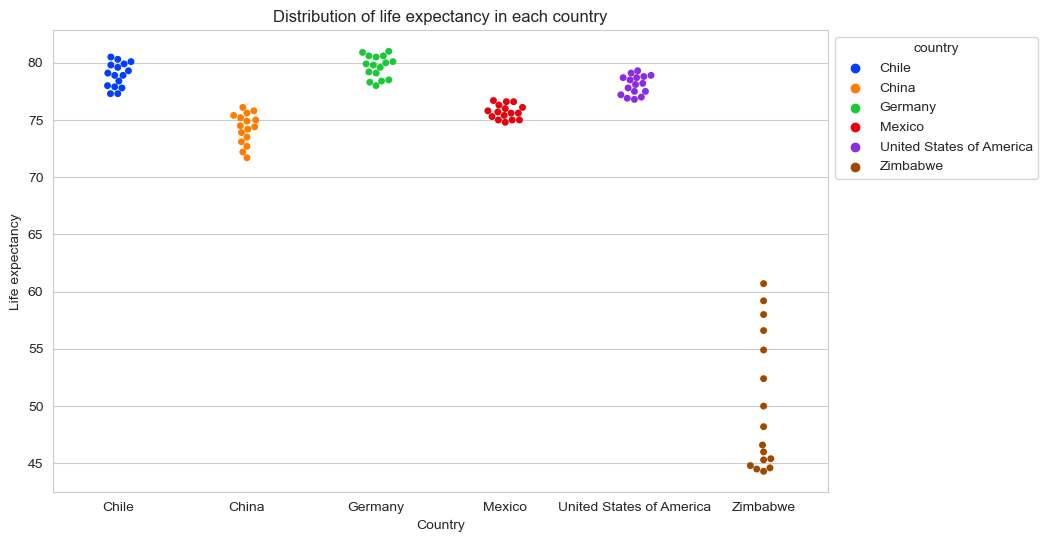

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(data=df, x='country', y='life_expectancy', hue='country', palette='bright')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.title('Distribution of life expectancy in each country')
plt.xlabel('Country')
plt.ylabel('Life expectancy')

plt.show()

From the swarmplots above, we can see the distribution of each country. Zimbabwe has much more variation in life expectancy than the other countries although we previously saw that Zimbabwe had the lowest GDP. 

Even though Chile had the 2nd lowest GDP, their life expectancy is significantly greater and less varied than Zimbabwe's which could show a discrepancy in external factors that influence life expectancy. At the same time, Chile has a much lower GDP compared to the richer countries, the distribution of Chile's life expectancy is at a similar distribution to the richer countries which could show some evidence that Chile has reached a GDP threshold where the improvements on life expectancy has diminished with any significant increase in GDP after this threshold.

Now that we have taken a look at the GDP of these countries as well as the distribution of their life expectancy, we will look into the relationship between GDP and life expectancy using a scatterplot:

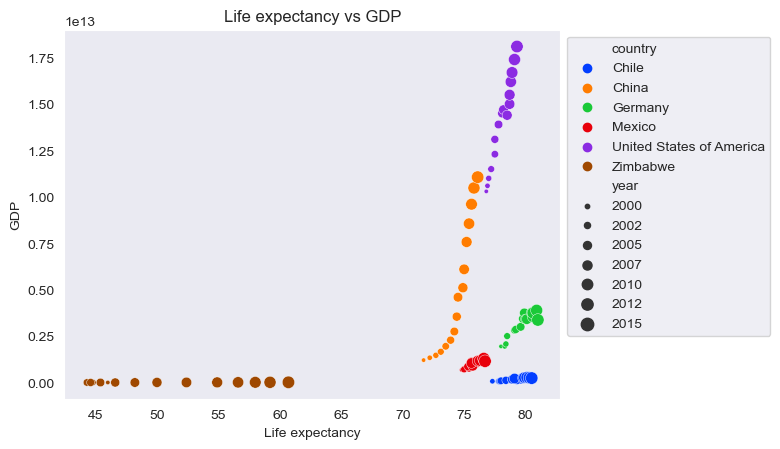

In [10]:
sns.set_style('dark')
ax = sns.scatterplot(data=df, x='life_expectancy', y='gdp', hue='country', palette='bright', size='year', sizes=(10, 80))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))


plt.title('Life expectancy vs GDP')
plt.xlabel('Life expectancy')
plt.ylabel('GDP')

plt.show()

The above scatterplot displays the varying correlations in the relationship between life expectancy and GDP for these countries. However, we are unable to see the details of some countries, so we will look at the correlation of each country individually:

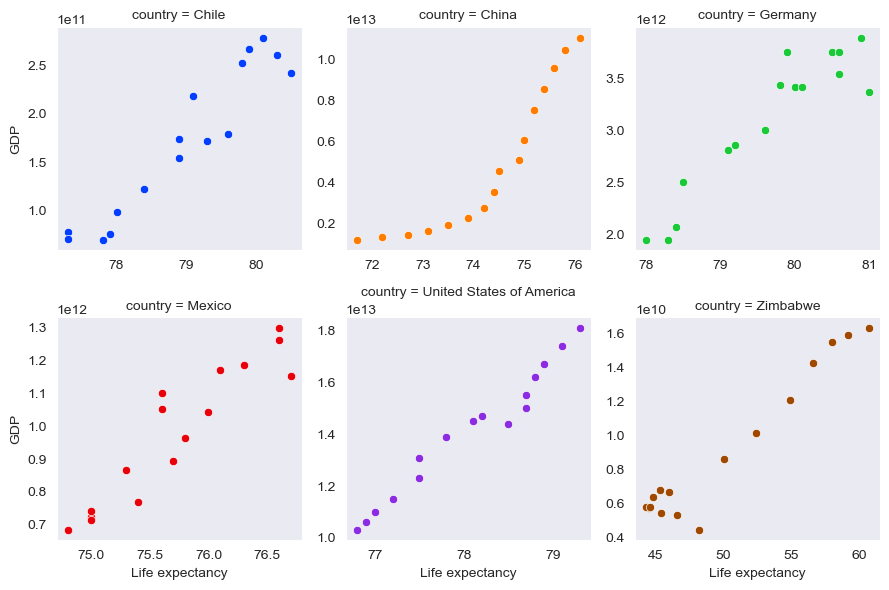

In [11]:
grid = sns.FacetGrid(df, col='country', hue='country', palette='bright', col_wrap=3, sharey=False, sharex=False)
grid.map(sns.scatterplot, 'life_expectancy', 'gdp')

grid.set_axis_labels('Life expectancy', 'GDP')

plt.show()

From the above plots we can see there is an overall positive correlation between GDP and life expectancy amongst countries, with an outlier of China exhibiting an exponential correlation during this time. This positive correlation suggests that an increased GDP is associated with a higher life expectancy.

## Conclusion:

From this project, we gained the following insights:
#### 1. Identifying the relationship between GDP and life expectancy of these countries:
* The relationship between GDP and life expectancy exhibited an overall positive correlation which was expected and this suggested that an increase in GDP is associated with a higher life expectancy.

#### 2. When exploring trends, distributions and statistics of life expectancy of each country we found:
* Overall there was a positive increasing trend in life expectancy of each country.
     * Zimbabwe had the highest variation in life expectancy as well as the lowest life expectancy of 44.3
     * Germany saw the highest peak in life expectancy at 81.
     * The average life expectancy of these countries was at 72.79

#### 3. When exploring trends of GDP's of each country we found:
* Overall there was a positive increasing trend in GDP's of each country.
     * The U.S. and China had the highest increase in GDP from 2000 to 2015 whilst the U.S. had the largest GDP amongst these countries at 18.1 trillion dollars.
     * Zimbabwe had the lowest GDP amongst these countries at around 4.4 billion dollars.
     * The average GDP of these countries was at around 3.9 trillion dollars.

#### 4. When exploring the graphs for any odd features we found:
* There was a turning point at around 2008 for GDP growth in countries.
    * From these countries, China was least affected.
    * Mexico seemed to have experienced the largest decline.
    * Zimbabwe had a relatively large increase promptly after this.
* In the trends for life expectancy just after 2008, all countries had an increase but Chile had a decline and Mexico experienced a slow in growth.
* In the distributions of life expectancy, Chile had a considerably lower GDP than most countries although having a high life expectancy similar to the wealthier countries.
* Lastly, in the correlation between GDP and life expectancy, China was the only country that experienced an exponential growth.

## Further Research:

In this project, there were a few stand out points that can amount to further research, these points were as follows:
* The recession that was experienced in the U.S. in 2008 and how that impacted Mexico and Chile since their GDP seemed to have been affected the most.
* The GDP threshold that was observed with Chile's surprisingly high life expectancy for a considerably low GDP - is there a GDP threshold being observed here or is another factor contributing more influence towards Chile's high life expectancy?
* The irregularity in life expectancy of Mexico and Chile just after 2008.
* China's exponential correlation between GDP and life expectancy - how was China able to have such a high growth in GDP during this time?
* Zimbabwe's surge in GDP just after 2008 - what was the reason Zimbabwe had a relatively large increase in GDP shortly after 2008?